In [2]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
np.isnan(x_train).any()
np.isnan(x_test).any()

False

In [5]:
len(x_train)

60000

In [6]:
input_shape = (28, 28, 1)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

In [7]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [9]:
y_train[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)>

tf.Tensor([0. 0. 0. 1. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)


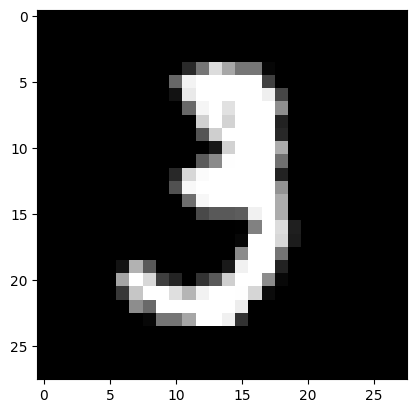

In [15]:
plt.imshow(x_train[10], cmap="gray")
print(y_train[10])

In [18]:
batch_size = 64
num_classes = 10
epochs = 15


In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation="relu", input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64,(3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [20]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [21]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/15
844/844 [==============================] - 102s 119ms/step - loss: 0.2265 - acc: 0.9293 - val_loss: 0.0514 - val_acc: 0.9855
Epoch 2/15
844/844 [==============================] - 98s 116ms/step - loss: 0.0737 - acc: 0.9786 - val_loss: 0.0492 - val_acc: 0.9878
Epoch 3/15
844/844 [==============================] - 96s 113ms/step - loss: 0.0566 - acc: 0.9841 - val_loss: 0.0304 - val_acc: 0.9905
Epoch 4/15
844/844 [==============================] - 96s 113ms/step - loss: 0.0485 - acc: 0.9858 - val_loss: 0.0293 - val_acc: 0.9932
Epoch 5/15
844/844 [==============================] - 98s 116ms/step - loss: 0.0429 - acc: 0.9876 - val_loss: 0.0316 - val_acc: 0.9917
Epoch 6/15
844/844 [==============================] - 98s 116ms/step - loss: 0.0431 - acc: 0.9879 - val_loss: 0.0284 - val_acc: 0.9932
Epoch 7/15
844/844 [==============================] - 97s 115ms/step - loss: 0.0411 - acc: 0.9883 - val_loss: 0.0281 - val_acc: 0.9933
Epoch 8/15
844/844 [==============================] - 

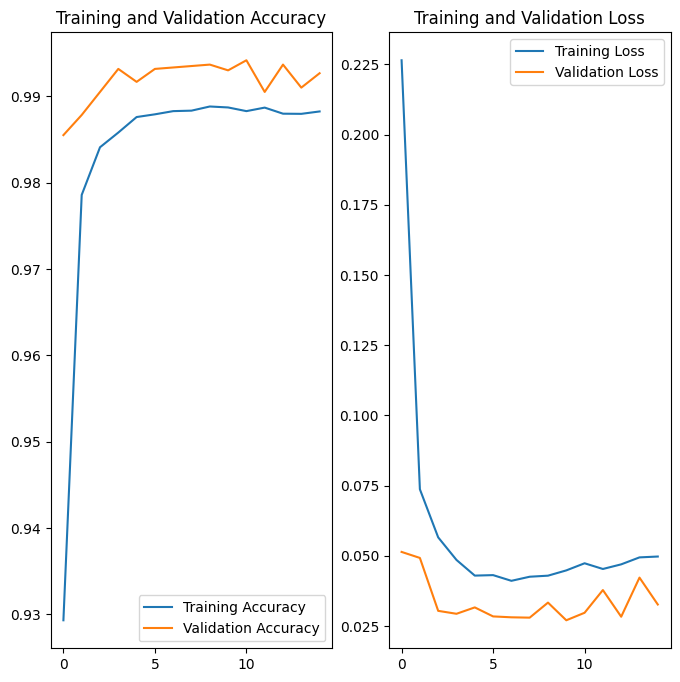

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = 15
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.0252 - acc: 0.9929


In [27]:
# Predict the values from the testing dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

313/313 [==============================] - 5s 16ms/step


<Axes: >

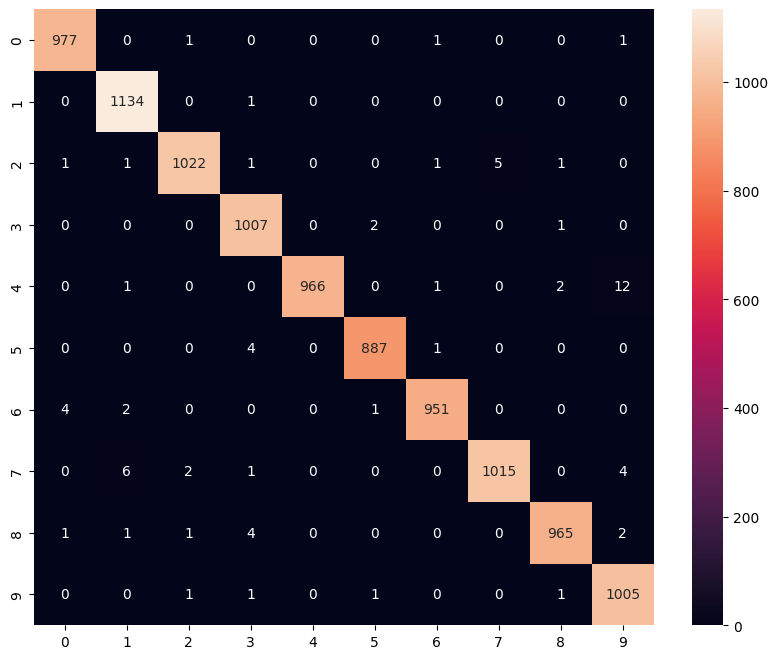

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        36928     
                                                      

In [50]:
img = tf.keras.utils.load_img(
    r"C:\Users\shash\Downloads\number_seven.jpg", target_size=(28, 28), color_mode='grayscale'
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(np.array(predictions[0]).tolist().index(1))

1/1 [==============================] - 0s 30ms/step
7


In [53]:
model.save("mnist.keras")